In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
df=pd.read_csv("diamonds_new.csv")

In [3]:
df

,carat,cut,color,clarity,table,x,y,z,price_new
0,0.23,Ideal,E,SI2,55.0,3.95,3.98,2.43,163.0
1,0.21,Premium,E,SI1,61.0,3.89,3.84,2.31,163.0
2,0.23,Good,E,VS1,65.0,4.05,4.07,2.31,163.5
3,0.29,Premium,I,VS2,58.0,4.20,4.23,2.63,167.0
4,0.31,Good,J,SI2,58.0,4.34,4.35,2.75,167.5
...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,57.0,5.75,5.76,3.50,1378.5
53936,0.72,Good,D,SI1,55.0,5.69,5.75,3.61,1378.5
53937,0.70,Very Good,D,SI1,60.0,5.66,5.68,3.56,1378.5
53938,0.86,Premium,H,SI2,58.0,6.15,6.12,3.74,1378.5


In [4]:
df.head()

,carat,cut,color,clarity,table,x,y,z,price_new
0,0.23,Ideal,E,SI2,55.0,3.95,3.98,2.43,163.0
1,0.21,Premium,E,SI1,61.0,3.89,3.84,2.31,163.0
2,0.23,Good,E,VS1,65.0,4.05,4.07,2.31,163.5
3,0.29,Premium,I,VS2,58.0,4.20,4.23,2.63,167.0
4,0.31,Good,J,SI2,58.0,4.34,4.35,2.75,167.5


In [5]:
df.tail()

,carat,cut,color,clarity,table,x,y,z,price_new
53935,0.72,Ideal,D,SI1,57.0,5.75,5.76,3.50,1378.5
53936,0.72,Good,D,SI1,55.0,5.69,5.75,3.61,1378.5
53937,0.70,Very Good,D,SI1,60.0,5.66,5.68,3.56,1378.5
53938,0.86,Premium,H,SI2,58.0,6.15,6.12,3.74,1378.5
53939,0.75,Ideal,D,SI2,55.0,5.83,5.87,3.64,1378.5


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   carat      53841 non-null  float64
 1   cut        53940 non-null  object 
 2   color      53884 non-null  object 
 3   clarity    53940 non-null  object 
 4   table      53877 non-null  float64
 5   x          53940 non-null  float64
 6   y          53940 non-null  float64
 7   z          53940 non-null  float64
 8   price_new  53940 non-null  float64
dtypes: float64(6), object(3)
memory usage: 3.7+ MB


In [7]:
df.describe()

,carat,table,x,y,z,price_new
count,53841.000000,53877.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.798120,57.457719,5.731157,5.734526,3.539635,1966.399861
std,0.474428,2.235742,1.121761,1.142135,0.703869,1994.719869
min,0.200000,43.000000,0.000000,0.000000,0.000000,163.000000
25%,0.400000,56.000000,4.710000,4.720000,2.910000,475.000000
50%,0.700000,57.000000,5.700000,5.710000,3.530000,1200.500000
75%,1.040000,59.000000,6.540000,6.540000,4.040000,2662.125000
max,5.010000,95.000000,10.740000,58.900000,31.800000,9411.500000


In [8]:
df.shape

(53940, 9)







DATA PREPROCESSING

In [9]:
df.isnull().sum()

carat        99
cut           0
color        56
clarity       0
table        63
x             0
y             0
z             0
price_new     0
dtype: int64

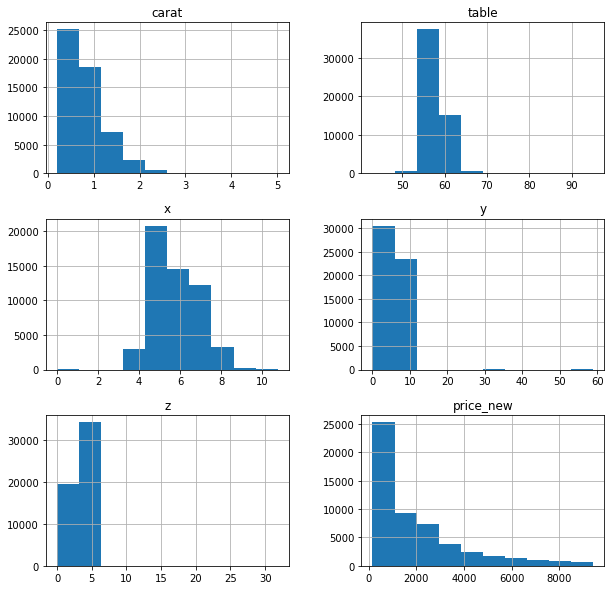

In [10]:
df.hist(figsize=[10,10])
plt.show()

In [11]:
df["cut"].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [12]:
df["color"].value_counts()

G    11236
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [13]:
df["clarity"].value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

In [14]:
duplicates = df[df.duplicated()]
duplicates

,carat,cut,color,clarity,table,x,y,z,price_new
1005,0.79,Ideal,G,SI1,57.0,5.90,5.85,3.66,1449.0
1006,0.79,Ideal,G,SI1,57.0,5.90,5.85,3.66,1449.0
1007,0.79,Ideal,G,SI1,57.0,5.90,5.85,3.66,1449.0
1008,0.79,Ideal,G,SI1,57.0,5.90,5.85,3.66,1449.0
2025,1.52,Good,E,I1,58.0,7.53,7.42,4.28,1552.5
...,...,...,...,...,...,...,...,...,...
47969,0.52,Ideal,D,VS2,55.0,5.19,5.16,3.20,959.5
49326,0.51,Ideal,F,VVS2,56.0,5.17,5.19,3.17,1046.5
49557,0.71,Good,F,SI2,60.0,0.00,0.00,0.00,1065.0
50079,0.51,Ideal,F,VVS2,56.0,5.19,5.17,3.17,1101.5


In [15]:
duplicates.shape

(148, 9)

In [16]:


df.isnull().sum()

carat        99
cut           0
color        56
clarity       0
table        63
x             0
y             0
z             0
price_new     0
dtype: int64

In [17]:
df1=df

In [18]:
df1["carat"]=df1["carat"].fillna(df1["carat"].median)
df1["color"]=df1["color"].fillna(df1["color"].median)
df1["table"]=df1["table"].fillna(df1["table"].median)

In [19]:
df1.isnull().sum()

carat        0
cut          0
color        0
clarity      0
table        0
x            0
y            0
z            0
price_new    0
dtype: int64

In [20]:
df = df.drop(df[df["x"]==0].index)
df = df.drop(df[df["y"]==0].index)
df = df.drop(df[df["z"]==0].index)
df.shape

(53932, 9)

<AxesSubplot:>

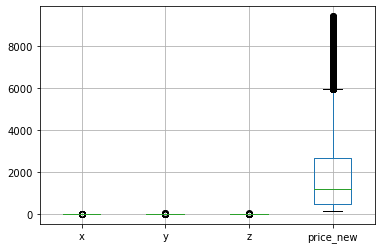

In [21]:
df.boxplot()

In [22]:
Q1 = df['price_new'].quantile(0.25)
Q2 = df['price_new'].quantile(0.5)
Q3 = df['price_new'].quantile(0.75)
IQR = Q3- Q1

low_lim= Q1 - (1.5 * IQR)
up_lim= Q3 + (1.5 * IQR)
print(low_lim,up_lim)


-2805.8125 5942.6875


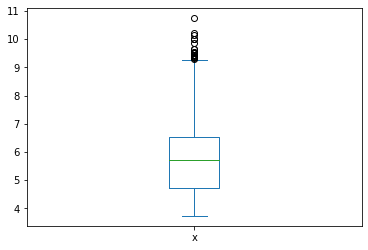

In [23]:
df["x"].plot(kind="box")
plt.show()

In [24]:
Q1 = df['x'].quantile(0.25)
Q2 = df['x'].quantile(0.5)
Q3 = df['x'].quantile(0.75)
IQR = Q3- Q1

low_lim= Q1 - (1.5 * IQR)
up_lim= Q3 + (1.5 * IQR)
print(low_lim,up_lim)


1.9649999999999999 9.285


In [25]:
df[(df['x'] < low_lim) | (df['x'] > up_lim)].index

Int64Index([22741, 22831, 23644, 24131, 24297, 24328, 24816, 25460, 25850,
            25998, 25999, 26431, 26444, 26534, 26932, 27130, 27415, 27514,
            27630, 27638, 27649, 27679, 27684, 27685],
           dtype='int64')

In [26]:
df1=df.drop([22741, 22831, 23644, 24131, 24297, 24328, 24816, 25460, 25850,
            25998, 25999, 26431, 26444, 26534, 26932, 27130, 27415, 27514,
            27630, 27638, 27649, 27679, 27684, 27685])

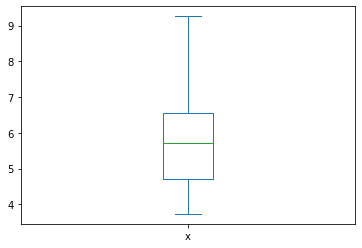

In [27]:
df1["x"].plot(kind="box")
plt.show()

In [28]:
Q1 = df['y'].quantile(0.25)
Q2 = df['y'].quantile(0.5)
Q3 = df['y'].quantile(0.75)
IQR = Q3- Q1

low_lim= Q1 - (1.5 * IQR)
up_lim= Q3 + (1.5 * IQR)
print(low_lim,up_lim)


1.9899999999999993 9.27


In [29]:
df[(df['y'] < low_lim) | (df['y'] > up_lim)].index

Int64Index([22741, 22831, 23644, 24067, 24131, 24297, 24328, 25460, 25998,
            25999, 26431, 26444, 26534, 27130, 27415, 27514, 27630, 27638,
            27649, 27679, 27685, 49189],
           dtype='int64')

In [30]:
df1=df.drop([22741, 22831, 23644, 24067, 24131, 24297, 24328, 25460, 25998,
            25999, 26431, 26444, 26534, 27130, 27415, 27514, 27630, 27638,
            27649, 27679, 27685, 49189])

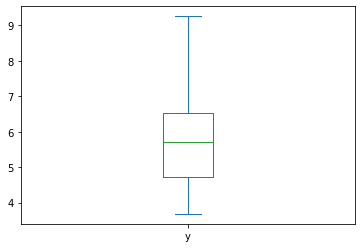

In [31]:
df1["y"].plot(kind="box")
plt.show()

<AxesSubplot:>

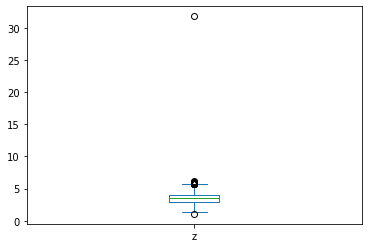

In [32]:
df1["z"].plot(kind="box")

In [33]:
Q1 = df['z'].quantile(0.25)
Q2 = df['z'].quantile(0.5)
Q3 = df['z'].quantile(0.75)

In [34]:
IQR = Q3- Q1

low_lim= Q1 - (1.5 * IQR)
up_lim= Q3 + (1.5 * IQR)
print(low_lim,up_lim)

1.2150000000000003 5.734999999999999


In [35]:
df[(df['z'] < low_lim) | (df['z'] > up_lim)].index

Int64Index([14635, 16283, 17196, 19346, 21758, 22540, 23539, 23644, 24067,
            24131, 24297, 24328, 25998, 25999, 26100, 26194, 26431, 26444,
            26534, 26744, 27130, 27415, 27515, 27516, 27517, 27518, 27630,
            27679, 48410],
           dtype='int64')

In [36]:
len(df[(df['z'] < low_lim) | (df['z'] > up_lim)])

29

In [37]:
df1=df.drop([14635, 16283, 17196, 19346, 21758, 22540, 23539, 23644, 24067,
            24131, 24297, 24328, 25998, 25999, 26100, 26194, 26431, 26444,
            26534, 26744, 27130, 27415, 27515, 27516, 27517, 27518, 27630,
            27679, 48410])

<AxesSubplot:>

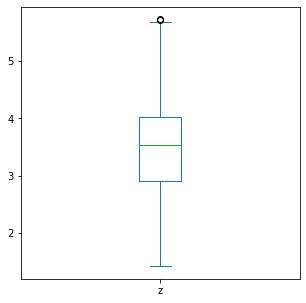

In [38]:
df1["z"].plot(kind="box",figsize=[5,5])

<AxesSubplot:>

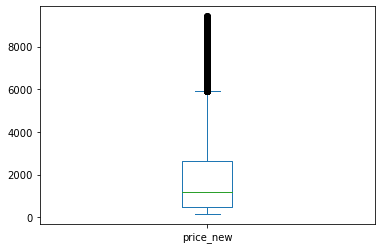

In [39]:
df1["price_new"].plot(kind="box")

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


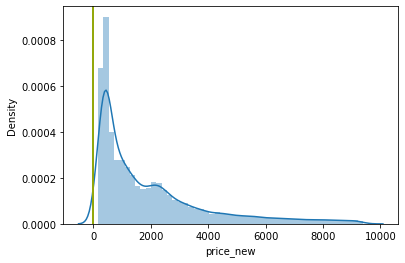

In [40]:
sns.distplot(df['price_new'])
plt.axvline(low_lim, color = "r")
plt.axvline(up_lim, color = "b")
plt.axvline(Q1, color = "g")
plt.axvline(Q3, color = "y")
plt.show()

In [41]:
df2= pd.get_dummies(df1, columns=['color'])
df2

,carat,cut,clarity,table,x,y,z,price_new,"color_<bound method NDFrame._add_numeric_operations.<locals>.median of 0 E\n1 E\n2 E\n3 I\n4 J\n ..\n53935 D\n53936 D\n53937 D\n53938 H\n53939 D\nName: color, Length: 53940, dtype: object>",color_D,color_E,color_F,color_G,color_H,color_I,color_J
0,0.23,Ideal,SI2,55.0,3.95,3.98,2.43,163.0,0,0,1,0,0,0,0,0
1,0.21,Premium,SI1,61.0,3.89,3.84,2.31,163.0,0,0,1,0,0,0,0,0
2,0.23,Good,VS1,65.0,4.05,4.07,2.31,163.5,0,0,1,0,0,0,0,0
3,0.29,Premium,VS2,58.0,4.20,4.23,2.63,167.0,0,0,0,0,0,0,1,0
4,0.31,Good,SI2,58.0,4.34,4.35,2.75,167.5,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,SI1,57.0,5.75,5.76,3.50,1378.5,0,1,0,0,0,0,0,0
53936,0.72,Good,SI1,55.0,5.69,5.75,3.61,1378.5,0,1,0,0,0,0,0,0
53937,0.7,Very Good,SI1,60.0,5.66,5.68,3.56,1378.5,0,1,0,0,0,0,0,0
53938,0.86,Premium,SI2,58.0,6.15,6.12,3.74,1378.5,0,0,0,0,0,1,0,0


In [42]:



from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [43]:
s = (df1.dtypes =="object")
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

Categorical variables:
['carat', 'cut', 'color', 'clarity', 'table']


In [44]:
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()


df1["cut"]= label_encoder.fit_transform(df1["cut"]) 
print(df1.head())

  carat  cut color clarity table     x     y     z  price_new
0  0.23    2     E     SI2  55.0  3.95  3.98  2.43      163.0
1  0.21    3     E     SI1  61.0  3.89  3.84  2.31      163.0
2  0.23    1     E     VS1  65.0  4.05  4.07  2.31      163.5
3  0.29    3     I     VS2  58.0  4.20  4.23  2.63      167.0
4  0.31    1     J     SI2  58.0  4.34  4.35  2.75      167.5


In [45]:
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()

df1["clarity"]= label_encoder.fit_transform(df1["clarity"]) 
print(df1.head())

  carat  cut color  clarity table     x     y     z  price_new
0  0.23    2     E        3  55.0  3.95  3.98  2.43      163.0
1  0.21    3     E        2  61.0  3.89  3.84  2.31      163.0
2  0.23    1     E        4  65.0  4.05  4.07  2.31      163.5
3  0.29    3     I        5  58.0  4.20  4.23  2.63      167.0
4  0.31    1     J        3  58.0  4.34  4.35  2.75      167.5


In [46]:

df1["cut"].unique()

array([2, 3, 1, 4, 0])

In [47]:
df1["cut"].nunique()

5

In [48]:
df1["clarity"].unique()

array([3, 2, 4, 5, 7, 6, 0, 1])

In [49]:
df1["clarity"].nunique()

8

In [50]:
df1["color"].nunique()

8

In [51]:
df1["color"].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D',
       <bound method NDFrame._add_numeric_operations.<locals>.median of 0        E
       1        E
       2        E
       3        I
       4        J
               ..
       53935    D
       53936    D
       53937    D
       53938    H
       53939    D
       Name: color, Length: 53940, dtype: object>                                 ],
      dtype=object)

In [52]:
df1

,carat,cut,color,clarity,table,x,y,z,price_new
0,0.23,2,E,3,55.0,3.95,3.98,2.43,163.0
1,0.21,3,E,2,61.0,3.89,3.84,2.31,163.0
2,0.23,1,E,4,65.0,4.05,4.07,2.31,163.5
3,0.29,3,I,5,58.0,4.20,4.23,2.63,167.0
4,0.31,1,J,3,58.0,4.34,4.35,2.75,167.5
...,...,...,...,...,...,...,...,...,...
53935,0.72,2,D,2,57.0,5.75,5.76,3.50,1378.5
53936,0.72,1,D,2,55.0,5.69,5.75,3.61,1378.5
53937,0.7,4,D,2,60.0,5.66,5.68,3.56,1378.5
53938,0.86,3,H,3,58.0,6.15,6.12,3.74,1378.5


In [53]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53903 entries, 0 to 53939
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   carat      53903 non-null  object 
 1   cut        53903 non-null  int32  
 2   color      53903 non-null  object 
 3   clarity    53903 non-null  int32  
 4   table      53903 non-null  object 
 5   x          53903 non-null  float64
 6   y          53903 non-null  float64
 7   z          53903 non-null  float64
 8   price_new  53903 non-null  float64
dtypes: float64(4), int32(2), object(3)
memory usage: 3.7+ MB


In [54]:
color_dict = {"J": 1,"I": 2,"H": 3,"G": 4,"F": 5,"E": 6,"D": 7}
df1['color'] = df1['color'].map(color_dict)

In [55]:
df['color'] = df['color'].astype('category')

In [56]:
df1

,carat,cut,color,clarity,table,x,y,z,price_new
0,0.23,2,6.0,3,55.0,3.95,3.98,2.43,163.0
1,0.21,3,6.0,2,61.0,3.89,3.84,2.31,163.0
2,0.23,1,6.0,4,65.0,4.05,4.07,2.31,163.5
3,0.29,3,2.0,5,58.0,4.20,4.23,2.63,167.0
4,0.31,1,1.0,3,58.0,4.34,4.35,2.75,167.5
...,...,...,...,...,...,...,...,...,...
53935,0.72,2,7.0,2,57.0,5.75,5.76,3.50,1378.5
53936,0.72,1,7.0,2,55.0,5.69,5.75,3.61,1378.5
53937,0.7,4,7.0,2,60.0,5.66,5.68,3.56,1378.5
53938,0.86,3,3.0,3,58.0,6.15,6.12,3.74,1378.5


In [57]:
from sklearn.preprocessing import StandardScaler

In [58]:
sc = StandardScaler()
df1.loc[:,["z_score_price"]] = sc.fit_transform(df1[["price_new"]])


In [59]:
df1

,carat,cut,color,clarity,table,x,y,z,price_new,z_score_price
0,0.23,2,6.0,3,55.0,3.95,3.98,2.43,163.0,-0.904270
1,0.21,3,6.0,2,61.0,3.89,3.84,2.31,163.0,-0.904270
2,0.23,1,6.0,4,65.0,4.05,4.07,2.31,163.5,-0.904019
3,0.29,3,2.0,5,58.0,4.20,4.23,2.63,167.0,-0.902261
4,0.31,1,1.0,3,58.0,4.34,4.35,2.75,167.5,-0.902010
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,2,7.0,2,57.0,5.75,5.76,3.50,1378.5,-0.293796
53936,0.72,1,7.0,2,55.0,5.69,5.75,3.61,1378.5,-0.293796
53937,0.7,4,7.0,2,60.0,5.66,5.68,3.56,1378.5,-0.293796
53938,0.86,3,3.0,3,58.0,6.15,6.12,3.74,1378.5,-0.293796
